<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/Convolution_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [0]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [0]:
sns.set(style='white', context='notebook', palette='deep')

In [0]:
train_file = './train.csv'
test_file = './test.csv'
output_file = 'submission.csv'

In [0]:
# Load Data
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:, 1:], raw_data[:, 0], test_size=0.1)

Text(0.5, 1.0, '28x28 data')

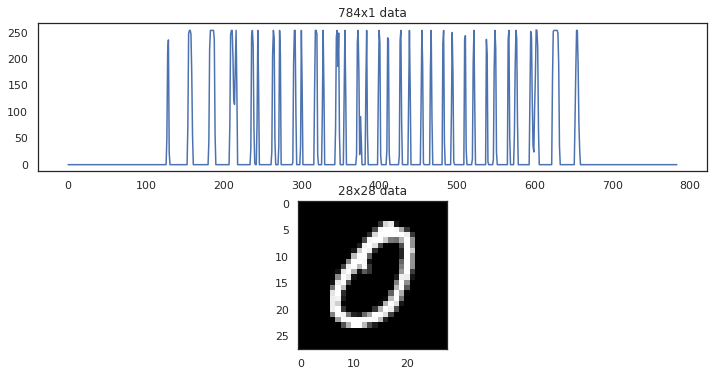

In [74]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28, 28), cmap='gray')
ax[1].set_title('28x28 data')

In [75]:
x_train.shape

(37800, 784)

In [76]:
y_train.shape

(37800,)

In [0]:
# Keras 형식으로 바꿔주고
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [78]:
x_train.shape

(37800, 28, 28, 1)

In [79]:
x_val.shape

(4200, 28, 28, 1)

In [0]:
# 정규화 해주고
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.

In [81]:
# one hot encoding 해주면
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [82]:
print(y_val[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
# Train the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
# Data argmentation
datagen = ImageDataGenerator(zoom_range=0.1,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             rotation_range=10)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [0]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [87]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 26s - loss: 0.8097 - acc: 0.7426 - val_loss: 0.1612 - val_acc: 0.9375
Epoch 2/20
 - 24s - loss: 0.3325 - acc: 0.8970 - val_loss: 0.0514 - val_acc: 0.9825
Epoch 3/20
 - 24s - loss: 0.2490 - acc: 0.9255 - val_loss: 0.0701 - val_acc: 0.9750
Epoch 4/20
 - 24s - loss: 0.2224 - acc: 0.9346 - val_loss: 0.0539 - val_acc: 0.9800
Epoch 5/20
 - 24s - loss: 0.1710 - acc: 0.9500 - val_loss: 0.0666 - val_acc: 0.9800
Epoch 6/20
 - 24s - loss: 0.1707 - acc: 0.9496 - val_loss: 0.0407 - val_acc: 0.9850
Epoch 7/20
 - 24s - loss: 0.1424 - acc: 0.9584 - val_loss: 0.0297 - val_acc: 0.9875
Epoch 8/20
 - 24s - loss: 0.1323 - acc: 0.9644 - val_loss: 0.0238 - val_acc: 0.9900
Epoch 9/20
 - 24s - loss: 0.1257 - acc: 0.9630 - val_loss: 0.0314 - val_acc: 0.9875
Epoch 10/20
 - 24s - loss: 0.1143 - acc: 0.9649 - val_loss: 0.0135 - val_acc: 0.9950
Epoch 11/20
 - 24s - loss: 0.1075 - acc: 0.9665 - val_loss: 0.0263 - val_acc: 0.9850
Epoch 12/20
 - 24s - loss: 0.1032 - acc: 0.9704 - val_loss: 0.0204 - val_a

In [88]:
# Evaluate
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final_accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0217, final_accuracy: 0.9926


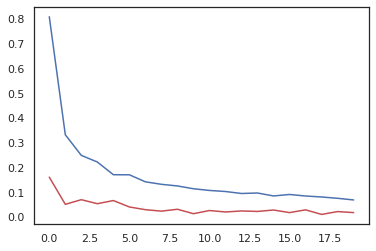

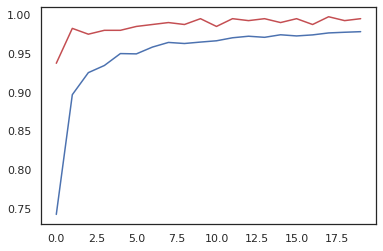

In [89]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [95]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[410   0   0   0   0   1   0   0   1   0]
 [  0 448   0   0   0   0   0   2   0   0]
 [  0   0 388   0   0   0   0   3   0   0]
 [  0   0   1 440   0   0   0   0   1   0]
 [  0   0   0   0 402   0   0   0   0   1]
 [  0   0   0   2   0 379   1   0   1   0]
 [  1   0   0   0   1   0 420   0   1   0]
 [  1   0   2   0   0   0   0 431   0   0]
 [  0   0   0   1   0   0   0   0 420   2]
 [  1   1   0   0   5   0   0   1   0 431]]


In [0]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1) / 255.

In [0]:
y_hat = model.predict(x_test, batch_size=64)

In [0]:
y_pred = np.argmax(y_hat, axis=1)

In [0]:
with open(output_file, 'w') as f:
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)):
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))